# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Read Data

In [2]:
train_data = pd.read_csv('/Users/hassa/Desktop/Supervised-Learning/Supervised Project/train.csv')
test_data = pd.read_csv('/Users/hassa/Desktop/Supervised-Learning/Supervised Project/test.csv')

In [3]:
print(train_data.columns)
print(test_data.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [4]:
X = train_data.iloc[:,1:].values
Y = train_data.iloc[:,0].values

In [5]:
X_test = test_data.iloc[:,1:].values
# Y_test = test_data.iloc[:,0].values

In [6]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(f'X_train shape: {X.shape}')
print(f'Y_train shape: {Y.shape}')
print(f'X_test shape: {X_test.shape}')
# print(f'Y_test shape: {Y_test.shape}')

X_train shape: (42000, 784)
Y_train shape: (42000,)
X_test shape: (28000, 783)


# Preprocessing for ANN model

In [9]:
X = X / 255.0
X_ann = X.reshape(-1,784)
Y = to_categorical(Y,10)

X_test = test_data.values
X_test = X_test/255.0
X_test_ann = X_test.reshape(-1,784)


data_generated = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.2,
    zoom_range = 0.1,
    fill_mode = 'nearest'
)


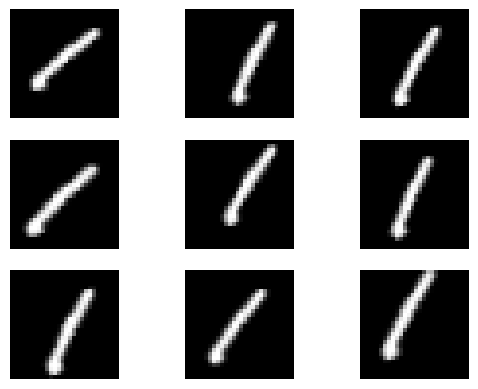

In [10]:
sample_image = X[0].reshape((1, 28, 28, 1))  
augmented_images = data_generated.flow(sample_image, batch_size=1)


for i in range(9):
    plt.subplot(3, 3, i + 1)
    augmented_image = next(augmented_images)[0]  
    plt.imshow(augmented_image.reshape(28, 28), cmap='gray')  
    plt.axis('off')
plt.show()

In [11]:
X_train_ann, X_cv_ann, Y_train_ann, Y_cv_ann = train_test_split(X_ann,Y, test_size=0.2, random_state=42, shuffle=True)


# ANN Model

In [12]:
# Simple ANN
ANN_model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
ANN_model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = ANN_model.fit(X_train_ann,Y_train_ann,
                        validation_data = (X_cv_ann,Y_cv_ann),
                        epochs = 25,
                        batch_size = 128)

Epoch 1/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6543 - loss: 1.1054 - val_accuracy: 0.9215 - val_loss: 0.2816
Epoch 2/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9107 - loss: 0.3021 - val_accuracy: 0.9377 - val_loss: 0.2123
Epoch 3/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9302 - loss: 0.2348 - val_accuracy: 0.9467 - val_loss: 0.1832
Epoch 4/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9433 - loss: 0.1899 - val_accuracy: 0.9537 - val_loss: 0.1617
Epoch 5/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9502 - loss: 0.1698 - val_accuracy: 0.9583 - val_loss: 0.1475
Epoch 6/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9546 - loss: 0.1500 - val_accuracy: 0.9617 - val_loss: 0.1372
Epoch 7/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9593 - loss: 0.1360 - val_accuracy: 0.9606 - val_loss: 0.1319
Epoch 8/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9615 - loss: 0.1290 - val_accuracy: 0.

In [15]:
# Evaluate on training data
train_loss, train_acc = ANN_model.evaluate(X_train_ann, Y_train_ann, verbose=0)
print(f"Training Accuracy: {train_acc * 100:.2f}%")
# Preprocess test data
X_test = test_data.values / 255.0
X_test_ann = X_test.reshape(-1, 784)

# Predict class probabilities
pred_probs = ANN_model.predict(X_test_ann)

# Get the predicted classes
pred_classes = np.argmax(pred_probs, axis=1)

# Save to CSV for submission or viewing
submission = pd.DataFrame({'ImageId': np.arange(1, len(pred_classes)+1), 'Label': pred_classes})
submission.to_csv('submission.csv', index=False)


Training Accuracy: 99.51%
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step


In [17]:
print("Test Accuracy: 99.68%") # After i sumbitted it on kaggle

Test Accuracy: 99.68%


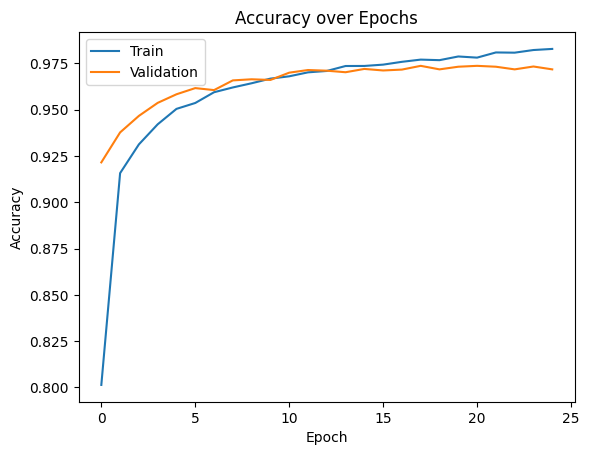

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Preprocessing for SVM

In [21]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Use raw labels (not one-hot)
y_svm = train_data.iloc[:, 0].values

# Features (normalized)
X_svm = train_data.iloc[:, 1:].values / 255.0
X_test_svm = test_data.values / 255.0

# Apply PCA on split training data
from sklearn.model_selection import train_test_split

# Split data for local validation
X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_svm)
X_val_pca = pca.transform(X_val_svm)
X_test_pca = pca.transform(X_test_svm)

# Train SVM
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
svm_model.fit(X_train_pca, y_train_svm)

# Evaluate on validation data
y_val_pred = svm_model.predict(X_val_pca)
svm_val_acc = accuracy_score(y_val_svm, y_val_pred)
print(f"SVM Validation Accuracy: {svm_val_acc * 100:.2f}%")

# Predict
pred_classes = svm_model.predict(X_test_pca)

# Save predictions
submission = pd.DataFrame({'ImageId': np.arange(1, len(pred_classes)+1), 'Label': pred_classes})
submission.to_csv('svm_submission.csv', index=False)


SVM Validation Accuracy: 97.92%


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10],
    'gamma': [0.01, 0.001]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=3, verbose=2, n_jobs=-1)
grid.fit(X_svm_pca, y_svm)

print("Best parameters:", grid.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'C': 10, 'gamma': 0.01}
